# Mortality Data from Fingertips: Filtering + Cleaning

In [1]:
import fingertips_py as ftp # https://fingertips-py.readthedocs.io/en/latest/
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import os
pd.set_option('display.max_colwidth', None)    # stop the column text truncating... 
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Use API to retrieve relevant data and store in csv files 

In [2]:
# Manual list from metadata CSV of all indicators from API 
# Click "indicator definitions" under "Domain: Key indicators"--> https://fingertips.phe.org.uk/profile/inhale/data#page/9/gid/8000003/pat/15/par/E92000001/ati/166/are/E38000004/iid/93575/age/1/sex/4/cid/4/tbm/1/page-options/ovw-do-0_car-do-0
# Indicator ID	Indicator 

# 1203	Mortality rate from lung cancer? Appeared in EDA but not in metadata CSV
# 1204	Mortality rate from chronic obstructive pulmonary disease
# 93641	Mortality rate from pneumonia (all mentions)
# 93640	Mortality rate from pneumonia (underlying cause)
# 93644	Mortality rate from asthma
# 93643	Mortality rate from COPD as a contributory cause
# 93578	Rate of death within 30 days of emergency hospital admissions for COPD
# 93661	Percentage of COPD deaths that occur in care homes
# 93662	Percentage of COPD deaths that occur in hospital
# 93663	Percentage of COPD deaths that occur at home
# 40701	Under 75 mortality rate from respiratory disease
# 93724	Under 75 mortality rate from respiratory disease considered preventable (2019 definition)
# 40702	Under 75 mortality rate from respiratory disease considered preventable (2016 definition)

In [3]:
"""
%%time
# 15 minutes

# list of 13 relevant indicator ids 
indicator_ids = [1203, 1204, 40701, 40702, 93578, 93640, 93641, 93643, 93644, 93661, 93662, 93663, 93724]

# make directory 
directory = './data_output/{0}'.format('mortality_data')
if not os.path.exists(directory):
    os.makedirs(directory)

# use api to retrieve data for all indicator ids and concate all  
lst_df = []
for id in indicator_ids:
    tmp_d = ftp.get_data_for_indicator_at_all_available_geographies(id)
    lst_df.append(tmp_d)
        
tmp_concat = pd.concat(lst_df, axis=0, ignore_index=True)

# save concatenated set to CSV and save in directory 
tmp_concat.to_csv(directory + '/mortality_data.csv')
    
# free memory
tmp_concat= None 
lst_df = None
"""

"\n%%time\n# 15 minutes\n\n# list of 13 relevant indicator ids \nindicator_ids = [1203, 1204, 40701, 40702, 93578, 93640, 93641, 93643, 93644, 93661, 93662, 93663, 93724]\n\n# make directory \ndirectory = './data_output/{0}'.format('mortality_data')\nif not os.path.exists(directory):\n    os.makedirs(directory)\n\n# use api to retrieve data for all indicator ids and concate all  \nlst_df = []\nfor id in indicator_ids:\n    tmp_d = ftp.get_data_for_indicator_at_all_available_geographies(id)\n    lst_df.append(tmp_d)\n        \ntmp_concat = pd.concat(lst_df, axis=0, ignore_index=True)\n\n# save concatenated set to CSV and save in directory \ntmp_concat.to_csv(directory + '/mortality_data.csv')\n    \n# free memory\ntmp_concat= None \nlst_df = None\n"

## Explore mortality df

In [4]:
mortality_df = pd.read_csv('./data_output/mortality_data/mortality_data.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
mortality_df.head()

Unnamed: 0  Indicator ID                   Indicator Name Parent Code  \
0           0          1203  Mortality rate from lung cancer         NaN   
1           1          1203  Mortality rate from lung cancer         NaN   
2           2          1203  Mortality rate from lung cancer         NaN   
3           3          1203  Mortality rate from lung cancer         NaN   
4           4          1203  Mortality rate from lung cancer         NaN   

  Parent Name  Area Code Area Name Area Type   Sex       Age  \
0         NaN  E92000001   England   England  Male  All ages   
1         NaN  E92000001   England   England  Male  All ages   
2         NaN  E92000001   England   England  Male  All ages   
3         NaN  E92000001   England   England  Male  All ages   
4         NaN  E92000001   England   England  Male  All ages   

                                          Category Type  \
0                                                   NaN   
1  County & UA deprivation deciles in England (IMD2010)   
2  County & UA deprivation deciles in England (IMD2010)   
3  County & UA deprivation deciles in England (IMD2010)   
4  County & UA deprivation deciles in England (IMD2010)   

                                Category Time period       Value  \
0                                    NaN   2001 - 03   93.446004   
1         Most deprived decile (IMD2010)   2001 - 03  129.952898   
2  Second most deprived decile (IMD2010)   2001 - 03  113.045523   
3   Third more deprived decile (IMD2010)   2001 - 03  122.301265   
4  Fourth more deprived decile (IMD2010)   2001 - 03  109.243674   

   Lower CI 95.0 limit  Upper CI 95.0 limit  Lower CI 99.8 limit  \
0            92.596587            94.301109                  NaN   
1           126.203319           133.782087                  NaN   
2           109.214648           116.972968                  NaN   
3           118.496771           126.193157                  NaN   
4           106.086345           112.468933                  NaN   

   Upper CI 99.8 limit    Count  Denominator Value note Recent Trend  \
0                  NaN  49011.0   72886051.0        NaN          NaN   
1                  NaN   4952.0    6435808.0        NaN          NaN   
2                  NaN   3528.0    5129660.0        NaN          NaN   
3                  NaN   4238.0    4944789.0        NaN          NaN   
4                  NaN   4824.0    6391084.0        NaN          NaN   

  Compared to England value or percentiles Compared to percentiles  \
0                             Not compared            Not compared   
1                                    Worse            Not compared   
2                                    Worse            Not compared   
3                                    Worse            Not compared   
4                                    Worse            Not compared   

   Time period Sortable  New data  Compared to goal  
0              20010000       NaN               NaN  
1              20010000       NaN               NaN  
2              20010000       NaN               NaN  
3              20010000       NaN               NaN  
4              20010000       NaN               NaN

In [6]:
# some basic analysis on full mortality df before cleaning 

print('Running analysis checks on Mortility DataFrame...\n\n')

print('The Mortality DataFrame has {0} rows and {1} columns'.format(mortality_df.shape[0], mortality_df.shape[1]))
print('\n\n')

print('Check 1. Columns and their datatypes are as follows:\n', mortality_df.dtypes, '\n\n')
    
print('Check 2. NULL values in Columns for the Mortality DataFrame as as follows (out of', mortality_df.shape[0], '): \n')
print(mortality_df.isna().sum())
print('\n\n')

print('data is prevalent for the following years (individual indicator analysis is required...) \n')
print(sorted(mortality_df['Time period Sortable'].unique()))
print('\n\n')

def find_unique_values(column_name):
    number = len(mortality_df[column_name].unique())
    print(number, 'Possible', column_name, ":")
    print(mortality_df[column_name].unique())
    print('\n\n')

find_unique_values('Parent Code')
find_unique_values('Parent Name')
find_unique_values('Area Code')
find_unique_values('Area Name')
find_unique_values('Area Type')

Running analysis checks on Mortility DataFrame...


The Mortality DataFrame has 374794 rows and 27 columns



Check 1. Columns and their datatypes are as follows:
 Unnamed: 0                                    int64
Indicator ID                                  int64
Indicator Name                               object
Parent Code                                  object
Parent Name                                  object
Area Code                                    object
Area Name                                    object
Area Type                                    object
Sex                                          object
Age                                          object
Category Type                                object
Category                                     object
Time period                                  object
Value                                       float64
Lower CI 95.0 limit                         float64
Upper CI 95.0 limit                         float64
Lowe

['England' 'County & UA' 'District & UA' 'County & UA (4/19-3/20)'
 'District & UA (4/19-3/20)' 'Combined authorities'
 'County & UA (pre 4/19)' 'District & UA (pre 4/19)' 'Region'
 'CCGs (since 4/20)' 'CCGs (2019/20)' 'CCGs (2018/19)']





In [7]:
# filter data to relevant ccgs 
inner_ccgs = ['NHS Buckinghamshire CCG', 'NHS Ealing CCG', 'NHS East Berkshire CCG', 'NHS Hillingdon CCG',
    'NHS Hounslow CCG', 'NHS North West Surrey CCG']

outer_ccgs =  ['NHS Basildon And Brentwood CCG', 'NHS Berkshire West CCG', 'NHS Brent CCG', 'NHS Croydon CCG', 
    'NHS Guildford and Waverley CCG', 'NHS Hammersmith And Fulham CCG', 'NHS Harrow CCG', 'NHS Herts Valleys CCG', 
    'NHS Kingston CCG', 'NHS Merton CCG', 'NHS Oxfordshire CCG', 'NHS Richmond CCG', 'NHS Surrey Heath CCG', 
    'NHS Sutton CCG', 'NHS Wandsworth CCG']

inner_ccg_df = mortality_df[mortality_df['Area Name'].isin(inner_ccgs)]
inner_ccg_df['Radius'] = "Inner"
outer_ccg_df = mortality_df[mortality_df['Area Name'].isin(outer_ccgs)]
outer_ccg_df['Radius'] = "Outer"

# concatenate 
df = inner_ccg_df.append(outer_ccg_df)

<ipython-input-7-29385f61a136>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inner_ccg_df['Radius'] = "Inner"
<ipython-input-7-29385f61a136>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outer_ccg_df['Radius'] = "Outer"


In [8]:
# Run analyses on filter df 

print('The NULL values in Columns for the filtered mortality DataFrame are as follows (out of', df.shape[0], 'rows): \n')
print(df.isna().sum())
print('\n\n')

def find_unique_values(column_name):
    number = len(df[column_name].unique())
    print(number, 'Possible', column_name, ":")
    print(df[column_name].unique())
    print('\n\n')

for i in list(df.columns):
    find_unique_values(i)

The NULL values in Columns for the filtered mortality DataFrame are as follows (out of 5347 rows): 

Unnamed: 0                                     0
Indicator ID                                   0
Indicator Name                                 0
Parent Code                                    0
Parent Name                                    0
Area Code                                      0
Area Name                                      0
Area Type                                      0
Sex                                            0
Age                                            0
Category Type                               5347
Category                                    5347
Time period                                    0
Value                                        188
Lower CI 95.0 limit                          188
Upper CI 95.0 limit                          188
Lower CI 99.8 limit                          188
Upper CI 99.8 limit                          188
Count            

In [9]:
# Delete these columns because we are only looking at England data: 

# Parent Code - all 'E92000001'
# Parent Name - all ‘England’ 

# Delete these columns because they are entirely missing/unknown data - but take note: 

# Category Type - all NaN 
# Category - all NaN 
# Recent trend - all ‘Cannot be calculated’
# Compared to percentiles - all ‘Not compared’ 
# New data - all NaN 
# Compared to goal - all NaN 

df = df.drop(columns=['Unnamed: 0', 'Parent Code', 'Parent Name', 'Category Type', 'Category', 'Recent Trend', 
                 'Compared to percentiles', 'New data', 'Compared to goal'])

# Clean time period column - get ride of extra zeros and cast to int 
df['Time period Sortable'] = (df['Time period Sortable']/10000).astype(int)

df.head()

Indicator ID  \
127460          1204   
127475          1204   
127476          1204   
127547          1204   
127548          1204   

                                                   Indicator Name  Area Code  \
127460  Mortality rate from chronic obstructive pulmonary disease  E38000048   
127475  Mortality rate from chronic obstructive pulmonary disease  E38000082   
127476  Mortality rate from chronic obstructive pulmonary disease  E38000084   
127547  Mortality rate from chronic obstructive pulmonary disease  E38000223   
127548  Mortality rate from chronic obstructive pulmonary disease  E38000224   

                      Area Name          Area Type      Sex       Age  \
127460           NHS Ealing CCG  CCGs (since 4/20)  Persons  All ages   
127475       NHS Hillingdon CCG  CCGs (since 4/20)  Persons  All ages   
127476         NHS Hounslow CCG  CCGs (since 4/20)  Persons  All ages   
127547  NHS Buckinghamshire CCG  CCGs (since 4/20)  Persons  All ages   
127548   NHS East Berkshire CCG  CCGs (since 4/20)  Persons  All ages   

       Time period  Value  Lower CI 95.0 limit  Upper CI 95.0 limit  \
127460   2006 - 08  42.30                36.95                48.20   
127475   2006 - 08  47.58                41.92                53.78   
127476   2006 - 08  54.46                47.24                62.46   
127547   2006 - 08  35.73                32.44                39.28   
127548   2006 - 08  46.33                41.67                51.36   

        Lower CI 99.8 limit  Upper CI 99.8 limit  Count  Denominator  \
127460                34.11                51.76  228.0     958022.0   
127475                38.90                57.52  258.0     772419.0   
127476                43.42                67.29  210.0     699487.0   
127547                30.64                41.38  433.0    1487851.0   
127548                39.15                54.37  365.0    1167880.0   

       Value note Compared to England value or percentiles  \
127460        NaN                                   Better   
127475        NaN                                  Similar   
127476        NaN                                  Similar   
127547        NaN                             Not compared   
127548        NaN                                   Better   

        Time period Sortable Radius  
127460                  2006  Inner  
127475                  2006  Inner  
127476                  2006  Inner  
127547                  2006  Inner  
127548                  2006  Inner

### Data dictionary (19 columns): 

- ‘Indicator ID’, code for indicator (int, eg 1204)
- ‘Indicator Name’, name for indicator (string, eg “Mortality rate from chronic obstructive pulmonary disease”)
- ‘Area Code’, code for ccg (int, eg 'E38000048’) 
- ‘Area Name’, name of CCG (string, eg 'NHS Ealing CCG’)
- ‘Area Type’,  ['CCGs (since 4/20)' 'CCGs (2019/20)' 'CCGs (2018/19)'] - NEED TO GROUPBY TO INVESTIGATE
- ‘Sex’, [Persons, Male, Female]
- ‘Age’, [‘All ages, ‘<75 yrs] 
- ‘Time period’, 2 year span 
- ‘Value’ rate for mortality - MAYBE THIS NOT FOR SOME INDICATORS 
- ‘Lower CI 95.0 limit’, 
- ‘Upper CI 95.0 limit’, 
- ‘Lower CI 99.8 limit’, 
- ‘Upper CI 99.8 limit’, 
- ‘Count’, how many died in 2 years? 
- ‘Denominator’, maybe population ???? CHECK OUT 
- ‘Value note’, ['Value suppressed to avoid disclosure by differencing', 'Value cannot be calculated as number of cases is too small', 'Value suppressed for disclosure control due to small count']
- ‘Compared to England value or percentiles’, 
- ‘Time period Sortable’ 
- ‘Possible Radius’, [Inner, Outer] 

Interestingly, there are many more "count" column values missing than "value" column values missing.
- count = number of deaths over two years (eg Hillingdon 12-33) 
- value = annual mortality rate (aka how many died / population each year) (eg. Hillingdon < 5/100,000)

In [10]:
# Check missing values by indicator:
print('Checking missing values by indicator (only columns that have any missing values):\n\n')

for group in df.groupby(['Indicator Name']):
    print("#############", group[0])
    print("rows:", len(group[1]), '\n')
    print(group[1][["Value", "Lower CI 95.0 limit", "Upper CI 95.0 limit", "Lower CI 99.8 limit",
                   "Upper CI 99.8 limit", "Count", "Denominator", "Value note", "Compared to England value or percentiles"]].isna().sum())
    print("\n")

Checking missing values by indicator (only columns that have any missing values):


############# Mortality rate from COPD as a contributory cause
rows: 400 

Value                                         0
Lower CI 95.0 limit                           0
Upper CI 95.0 limit                           0
Lower CI 99.8 limit                           0
Upper CI 99.8 limit                           0
Count                                        96
Denominator                                   0
Value note                                  304
Compared to England value or percentiles      0
dtype: int64


############# Mortality rate from asthma
rows: 400 

Value                                        87
Lower CI 95.0 limit                          87
Upper CI 95.0 limit                          87
Lower CI 99.8 limit                          87
Upper CI 99.8 limit                          87
Count                                       109
Denominator                                   0
Value

In [23]:
# Display number of rows for each year for each indicator 
# we pick any column (they will all contain the same value)
grouped = df.groupby(['Time period Sortable', 'Indicator Name']).count()['Area Code'].reset_index().rename(columns={'Area Code':'number_records'})

piv = grouped.pivot(
index = 'Time period Sortable',
columns='Indicator Name',
values='number_records'
)
piv

Indicator Name        Mortality rate from COPD as a contributory cause  \
Time period Sortable                                                     
2001                                                               NaN   
2002                                                               NaN   
2003                                                               NaN   
2004                                                               NaN   
2005                                                               NaN   
2006                                                              34.0   
2007                                                              34.0   
2008                                                              34.0   
2009                                                              34.0   
2010                                                              34.0   
2011                                                              34.0   
2012                                                              34.0   
2013                                                              34.0   
2014                                                              34.0   
2015                                                              34.0   
2016                                                              34.0   
2017                                                              26.0   

Indicator Name        Mortality rate from asthma  \
Time period Sortable                               
2001                                         NaN   
2002                                         NaN   
2003                                         NaN   
2004                                         NaN   
2005                                         NaN   
2006                                        34.0   
2007                                        34.0   
2008                                        34.0   
2009                                        34.0   
2010                                        34.0   
2011                                        34.0   
2012                                        34.0   
2013                                        34.0   
2014                                        34.0   
2015                                        34.0   
2016                                        34.0   
2017                                        26.0   

Indicator Name        Mortality rate from chronic obstructive pulmonary disease  \
Time period Sortable                                                              
2001                                                                        NaN   
2002                                                                        NaN   
2003                                                                        NaN   
2004                                                                        NaN   
2005                                                                        NaN   
2006                                                                       55.0   
2007                                                                       55.0   
2008                                                                       55.0   
2009                                                                       55.0   
2010                                                                       55.0   
2011                                                                       55.0   
2012                                                                       55.0   
2013                                                                       55.0   
2014                                                                       55.0   
2015                                                                       55.0   
2016                                                                       55.0   
2017                                                                        NaN   

Indicator Name        Mort

In [24]:
# show the above chart in graph form with facetgrid
# we can see that we have consistent file/row numbers for the mortality rate

# m = sns.FacetGrid(grouped, col='Indicator Name', col_wrap=3, height=8)
# m.map(sns.lineplot, 'Time period Sortable', 'nr_records')
# m.set(xticks=np.arange(2000, 2022, 2))

In [13]:
# what is the data window for each mortality indicator? 

print('Indicator statistics:\n')

for indicator in grouped['Indicator Name'].unique():
    t_df = grouped[grouped['Indicator Name'] == indicator]
    max_year = t_df['Time period Sortable'].max()
    min_year = t_df['Time period Sortable'].min()

    print(indicator, ":")
    
    print('{0} - {1} \n'.format(
        min_year, max_year)
    )

Indicator statistics:

Under 75 mortality rate from respiratory disease considered preventable (2019 definition) :
2001 - 2017 

Mortality rate from COPD as a contributory cause :
2006 - 2017 

Mortality rate from asthma :
2006 - 2017 

Mortality rate from chronic obstructive pulmonary disease :
2006 - 2016 

Mortality rate from pneumonia (all mentions) :
2006 - 2017 

Mortality rate from pneumonia (underlying cause) :
2006 - 2017 

Percentage of COPD deaths that occur at home :
2006 - 2016 

Percentage of COPD deaths that occur in care homes :
2006 - 2016 

Percentage of COPD deaths that occur in hospital :
2006 - 2016 

Under 75 mortality rate from respiratory disease :
2006 - 2017 

Under 75 mortality rate from respiratory disease considered preventable (2016 definition) :
2006 - 2016 

Rate of death within 30 days of emergency hospital admissions for COPD :
2010 - 2016 



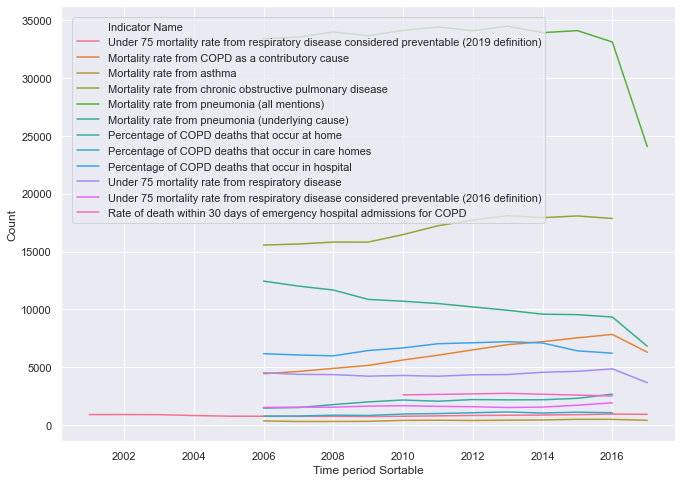

In [14]:
# I think this is still showing number_records, NOT the values (aka mortality rates)

# filter out male and female results, for now
special = df[df['Sex'] == 'Persons']

# Important graph is to plot the different indicators values by year (so use a sum instead of count)
grouped_sum = special.groupby(['Time period Sortable', 'Indicator Name']).sum()['Count'].reset_index()

# we will use seaborn here (for pandas might need a pivot table, where we break out indicator name)
# set the figure size with rc argument for seaborn (stack overflow)
sns.set(rc={'figure.figsize':(11,8)})

sns.lineplot(data=grouped_sum, x='Time period Sortable', y='Count', hue='Indicator Name', legend='full')

# Put the legend out of the figure using matlibplot (stackoverflow...)
plt.legend(loc=2, borderaxespad=1)

plt.show()

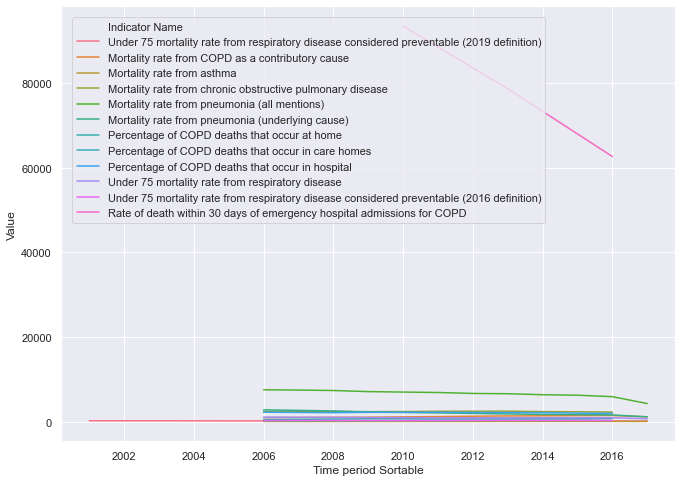

In [15]:
# and now by value

# Important graph is to plot the different indicators values by year (so use a sum instead of count)
grouped_sum = special.groupby(['Time period Sortable', 'Indicator Name']).sum()['Value'].reset_index()

# we will use seaborn here (for pandas might need a pivot table, where we break out indicator name)
# set the figure size with rc argument for seaborn (stack overflow)
sns.set(rc={'figure.figsize':(11,8)})

sns.lineplot(data=grouped_sum, x='Time period Sortable', y='Value', hue='Indicator Name', legend='full')

# Put the legend out of the figure using matlibplot (stackoverflow...)
plt.legend(loc=2, borderaxespad=1)

plt.show()

In [ ]:
# Important graph is to plot the different indicators values by year (so use a sum instead of count)
grouped_sum = special.groupby(['Time period Sortable', 'Indicator Name']).sum()['Value'].reset_index()

# we will use seaborn here (for pandas might need a pivot table, where we break out indicator name)
# set the figure size with rc argument for seaborn (stack overflow)
sns.set(rc={'figure.figsize':(11,8)})

sns.lineplot(data=grouped_sum, x='Time period Sortable', y='Value', hue='Indicator Name', legend='full')

# Put the legend out of the figure using matlibplot (stackoverflow...)
plt.legend(loc=2, borderaxespad=1)

plt.show()

In [39]:
# Get breakdown of WHY count and value are missing: 
def get_missing_notes(indicator):
    temp_df = df[df['Indicator Name'] == indicator]
    print(temp_df['Value note'].value_counts())

for indicator in grouped['Indicator Name'].unique():
    print("############", indicator)
    get_missing_notes(indicator)

############ Under 75 mortality rate from respiratory disease considered preventable (2019 definition)
Value suppressed to avoid disclosure by differencing    204
Name: Value note, dtype: int64
############ Mortality rate from COPD as a contributory cause
Value suppressed to avoid disclosure by differencing    96
Name: Value note, dtype: int64
############ Mortality rate from asthma
Value suppressed to avoid disclosure by differencing          104
Value cannot be calculated as number of cases is too small     58
Value suppressed for disclosure control due to small count      5
Name: Value note, dtype: int64
############ Mortality rate from chronic obstructive pulmonary disease
Series([], Name: Value note, dtype: int64)
############ Mortality rate from pneumonia (all mentions)
Value suppressed to avoid disclosure by differencing    96
Name: Value note, dtype: int64
############ Mortality rate from pneumonia (underlying cause)
Value suppressed to avoid disclosure by differencing    96
Na

In [25]:
# Check missing values by indicator BY YEAR:
# This just shows us that indicators missing values have values missing consistently over time 
print('Checking missing values by indicator (only columns that have any missing values):\n\n')

for group in df.groupby(['Indicator Name']):
    print("#############", group[0])
    temp_df = group[1]
    for group in temp_df.groupby(['Time period Sortable']):
        print("year:", group[0])
        print(group[1][["Value", "Lower CI 95.0 limit", "Upper CI 95.0 limit", "Lower CI 99.8 limit",
                   "Upper CI 99.8 limit", "Count", "Denominator", "Value note", "Compared to England value or percentiles"]].isna().sum())
    print("\n")

Checking missing values by indicator (only columns that have any missing values):


############# Mortality rate from COPD as a contributory cause
year: 2006
Value                                        0
Lower CI 95.0 limit                          0
Upper CI 95.0 limit                          0
Lower CI 99.8 limit                          0
Upper CI 99.8 limit                          0
Count                                        8
Denominator                                  0
Value note                                  26
Compared to England value or percentiles     0
dtype: int64
year: 2007
Value                                        0
Lower CI 95.0 limit                          0
Upper CI 95.0 limit                          0
Lower CI 99.8 limit                          0
Upper CI 99.8 limit                          0
Count                                        8
Denominator                                  0
Value note                                  26
Compared to England

Value                                        7
Lower CI 95.0 limit                          7
Upper CI 95.0 limit                          7
Lower CI 99.8 limit                          7
Upper CI 99.8 limit                          7
Count                                        7
Denominator                                  0
Value note                                  27
Compared to England value or percentiles     0
dtype: int64
year: 2010
Value                                        6
Lower CI 95.0 limit                          6
Upper CI 95.0 limit                          6
Lower CI 99.8 limit                          6
Upper CI 99.8 limit                          6
Count                                        6
Denominator                                  0
Value note                                  28
Compared to England value or percentiles     0
dtype: int64
year: 2011
Value                                        6
Lower CI 95.0 limit                          6
Upper CI 95.

dtype: int64
year: 2014
Value                                        0
Lower CI 95.0 limit                          0
Upper CI 95.0 limit                          0
Lower CI 99.8 limit                          0
Upper CI 99.8 limit                          0
Count                                        3
Denominator                                  0
Value note                                  18
Compared to England value or percentiles     0
dtype: int64
year: 2015
Value                                        0
Lower CI 95.0 limit                          0
Upper CI 95.0 limit                          0
Lower CI 99.8 limit                          0
Upper CI 99.8 limit                          0
Count                                        2
Denominator                                  0
Value note                                  19
Compared to England value or percentiles     0
dtype: int64
year: 2016
Value                                        0
Lower CI 95.0 limit                

In [41]:
df

Indicator ID  \
127460          1204   
127475          1204   
127476          1204   
127547          1204   
127548          1204   
127577          1204   
127592          1204   
127593          1204   
127664          1204   
127665          1204   
127694          1204   
127709          1204   
127710          1204   
127781          1204   
127782          1204   
127811          1204   
127826          1204   
127827          1204   
127898          1204   
127899          1204   
127928          1204   
127943          1204   
127944          1204   
128015          1204   
128016          1204   
128045          1204   
128060          1204   
128061          1204   
128132          1204   
128133          1204   
128162          1204   
128177          1204   
128178          1204   
128249          1204   
128250          1204   
128279          1204   
128294          1204   
128295          1204   
128366          1204   
128367          1204   
128396          1204   
128411          1204   
128412          1204   
128483          1204   
128484          1204   
128513          1204   
128528          1204   
128529          1204   
128600          1204   
128601          1204   
128756          1204   
128771          1204   
128772          1204   
128843          1204   
128844          1204   
128889          1204   
128917          1204   
128919          1204   
128952          1204   
129034          1204   
129035          1204   
129080          1204   
129108          1204   
129110          1204   
129143          1204   
129225          1204   
129226          1204   
129271          1204   
129299          1204   
129301          1204   
129334          1204   
129416          1204   
129417          1204   
129462          1204   
129490          1204   
129492          1204   
129525          1204   
129607          1204   
129608          1204   
129653          1204   
129681          1204   
129683          1204   
129716          1204   
129798          1204   
129799          1204   
129844          1204   
129872          1204   
129874          1204   
129907          1204   
129989          1204   
129990          1204   
130035          1204   
130063          1204   
130065          1204   
130098          1204   
130180          1204   
130181          1204   
130226          1204   
130254          1204   
130256          1204   
130289          1204   
130371          1204   
130372          1204   
130417          1204   
130445          1204   
130447          1204   
130480          1204   
130562          1204   
130563          1204   
130608          1204   
130636          1204   
130638          1204   
130671          1204   
130753          1204   
130754          1204   
130799          1204   
130827          1204   
130829          1204   
130862          1204   
130944          1204   
130945          1204   
130990          1204   
131018          1204   
131020          1204   
131053          1204   
131135          1204   
131136          1204   
131179          1204   
131207          1204   
131209          1204   
131242          1204   
131324          1204   
131325          1204   
131368          1204   
131396          1204   
131398          1204   
131431          1204   
131513          1204   
131514          1204   
131557          1204   
131585          1204   
131587          1204   
131620          1204   
131702          1204   
131703          1204   
131746          1204   
131774          1204   
131776          1204   
131809          1204   
131891          1204   
131892          1204   
131935          1204   
131963          1204   
131965          1204   
131998          1204   
132080          1204   
132081          1204   
132124          1204   
132152          1204   
132154          1204   
132187          1204   
132269          1204   
132270          1204   
132313          1204   
132341          1204   
132343          1204   


# Summary of Missing Data by Indicator: 

Missing Counts (number of deaths) are due to “Value suppressed to avoid disclosure by differencing”, but often the Value (rate of death per 100,000 people) is still calculated. 

The following indicator doesn't have enough data: 
- Rate of death within 30 days of emergency hospital admissions for COPD

The following indicators have both missing Value values and missing Counts and may not be relevant to our study: 
- Percentage of COPD deaths that occur at home
- Percentage of COPD deaths that occur in care homes
- Percentage of COPD deaths that occur in hospital 

The following indicators have missing Counts but zero missing Values: 

- Mortality rate from COPD as a contributory cause
- Mortality rate from chronic obstructive pulmonary disease
- Mortality rate from pneumonia (all mentions)
- Mortality rate from pneumonia (underlying cause)
- Under 75 mortality rate from respiratory disease
- Under 75 mortality rate from respiratory disease considered preventable (2016 definition)

The following categories have some missing Value values: 

- Mortality rate from asthma - 87 
- Under 75 mortality rate from respiratory disease considered preventable (2019 definition) - 2 missing values  

Further breakdown: 

### Mortality rate from COPD as a contributory cause
2006 - 2017 
rows: 400 

- Value: 0 missing 
- Count: 96 missing, “Value suppressed to avoid disclosure by differencing”, spread evenly over time, haven’t found pattern of which ones are missing each year 

### Mortality rate from asthma
2006-2017
rows: 400 

- Value: 87 missing
- Count:  109 missing
- “Value cannot be calculated as number of cases is too small”, “Value suppressed to avoid disclosure by differencing”, “Value suppressed for disclosure control due to small count”

### Mortality rate from chronic obstructive pulmonary disease
2006-2017

- NO MISSING DATA 

### Mortality rate from pneumonia (all mentions)
2006-2017
rows: 400 

- Value: 0 missing 
- Count: 96 missing (“Value suppressed to avoid disclosure by differencing”)

### Mortality rate from pneumonia (underlying cause)
2016-2017
rows: 400 

- Value: 0 missing 
- Count: 96 missing (“Value suppressed to avoid disclosure by differencing”)    

### Percentage of COPD deaths that occur at home
2006-2016
rows: 374 

- Value: 28 missing
- Count: 28 missing 
- “Value suppressed to avoid disclosure by differencing” 

### Percentage of COPD deaths that occur in care homes
2006-2016
rows: 374 

- Value: 59 missing 
- Count: 59 missing 
- “Value suppressed to avoid disclosure by differencing” 

### Percentage of COPD deaths that occur in hospital
2006-2016
rows: 374 

- Value: 10 missing
- Count: 10 missing
- “Value suppressed to avoid disclosure by differencing” 

### Rate of death within 30 days of emergency hospital admissions for COPD
2010, 2013, 2016 - not enough data? 
rows: 102 

- Value: 2 missing 
- Count: 2 missing
- “Value cannot be calculated as number of cases is too small”                                         

### Under 75 mortality rate from respiratory disease
2006-2017
rows: 1024 

- Value: 0 missing
- Count: 288 missing (“Value suppressed to avoid disclosure by differencing”) 

### Under 75 mortality rate from respiratory disease considered preventable (2016 definition)
2006-2017
rows: 231 

- Value: 0 missing
- Count: 15 missing (“Value suppressed to avoid disclosure by differencing”) 

### Under 75 mortality rate from respiratory disease considered preventable (2019 definition)
2001-2017 
rows: 663 

- Value: 2 missing
- Count: 204 missing (“Value suppressed to avoid disclosure by differencing”) 

# Questions for the team: 
CHOOSING INDICATORS: 
- Are we okay moving forward without the indicator "Rate of death within 30 days of emergency hospital admissions for COPD" because there is not enough data? --> YES  
- Do we want to look at the indicators of where COPD deaths occur? --> NO  
- Do we want to look at the indicator "Under 75 mortality rate from respiratory disease considered preventable (2019 definition)"? If so, what do we want to do with the 2 missing values? --> MAYBE

CHOOSING HOW TO DEAL WITH MISSING VALUES: 
- Do we want to look at values, not counts? (our main 6 indicators have zero missing) --> USE VALUES (JUST FOR MORTALITY) 
- What to do with "Mortality rate from asthma" missing values (87 out of 400 entries) --> NEED FURTHER ANALYSIS

# TO DO 
- Add non-respiratory indicators  
- What does "preventable" mean for respitory disease death rate? - then decide whether to keep those 2 columns 
- Find out for each indicator (eg "Mortality rate from asthma"), where are the missing counts coming from? Theory = one CCG over time 
- Write out justification for using value not count and also add answer to where missing count is coming from 